In [1]:
from keras.models import Sequential, load_model
from keras.layers import *
from keras import metrics
from keras.datasets import mnist

import numpy as np



def encodeNum(x):
    
    template = [0,0,0,0,0,0,0,0,0,0]
    template[x] = 1
    return template
    
def decodeNum(x):
    
    return x.index(max(x))
    
def loadDataset():
    
    
    print('loading test dataset...')
    (XT, YT), (XV, YV) = mnist.load_data()
    
    X_validate, X_test = np.split(XV,2)
    Y_validate_raw, Y_test_raw = np.split(YV,2)
    
    
    Y_train = []
    Y_validate = []
    Y_test = []
    

    for unencoded_label in YT:
        encodedNum = encodeNum(unencoded_label)
        Y_train.append(encodedNum)
        

    for unencoded_label in Y_validate_raw:
        encodedNum = encodeNum(unencoded_label)
        Y_validate.append(encodedNum) 


    for unencoded_label in Y_test_raw:
        encodedNum = encodeNum(unencoded_label)
        Y_test.append(encodedNum)
        
    return ((np.ceil(XT/255),np.array(Y_train)),(np.ceil(X_validate/255),np.array(Y_validate)),(np.ceil(X_test/255),np.array(Y_test)))
    


def buildModel():
    #define model
    print('building model...')
    
    classifier = Sequential()

    #input
    classifier.add(Input(shape=(28,28,1)))

    #hidden
    classifier.add(Conv2D(32,(3,3),padding="same"))
    classifier.add(MaxPooling2D(pool_size=(2,2),padding="same"))
    classifier.add(Dropout(0.1))
    
    classifier.add(Conv2D(32,(3,3),padding="same"))
    classifier.add(MaxPooling2D(pool_size=(2,2),padding="same"))
    
    classifier.add(Flatten())
    
    classifier.add(Dense(72,activation="relu"))
    classifier.add(Dense(36,activation="relu"))

    #output
    classifier.add(Dense(10, activation="softmax"))
    
    
    #compile
    classifier.compile(loss = 'binary_crossentropy', run_eagerly=True ,optimizer = 'adam', metrics=[metrics.CategoricalAccuracy()])
    
    return classifier



(images_train, labels_train), (images_validate, labels_validate), (images_test, labels_test) = loadDataset()

classifier = buildModel()
classifier.fit(x=images_train,y=labels_train,batch_size = 1,epochs=1,verbose="auto",shuffle=True)


print("validate...")
classifier.evaluate(x=images_validate,y=labels_validate)

print("test...")
classifier.evaluate(x=images_test,y=labels_test)

classifier.save('classifier.ai')


loading test dataset...
building model...


2022-08-19 12:31:40.564835: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 12:31:40.572089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 12:31:40.572383: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 12:31:40.573289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

InternalError: dnn PoolBackward launch failed [Op:MaxPoolGrad]

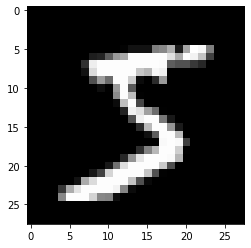

In [6]:

from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

(XT, YT), (XV, YV) = mnist.load_data()


plt.imshow(np.round(XT[0]),cmap="gray")
